In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
#data loading and understanding
#read the csv file and look at different columns and their data
loans = pd.read_csv('loan.csv')
loans.head(10)
loans.describe()

/var/folders/bv/1l_zzhtd3mz045wm7s5mnpdm0000gn/T/ipykernel_6540/2081033973.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


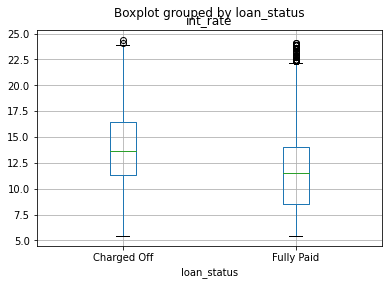

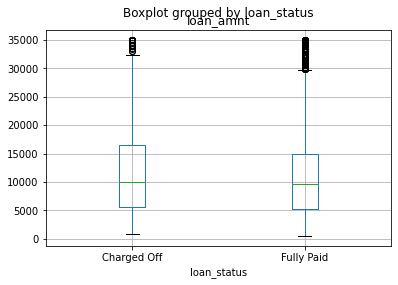

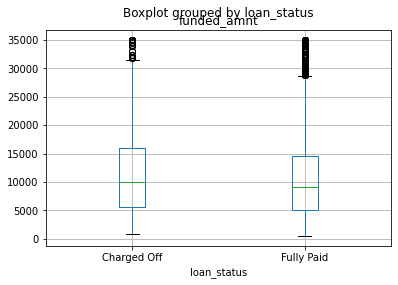

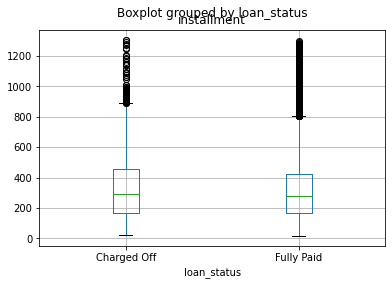

In [3]:
#data cleaning and manipulation
#following are some of the steps taken towards data cleansing/preprocessing
#1. missing values - 
    #remove rows and columns with missing values based on a percentage threshold
    #impute missing values
#2. preprocessing - 
    #filter out 'Current' members in loan_status
    #remove % symbol in int_rate column. do this for other symbols too
    #converting dates to datetime format
#3. outlier detection -
    #plot boxplots and interquartlie plots for relevant columns and remove outliers


#missing values
percentage = 85.0
min_count =  int(((100-percentage)/100)*loans.shape[1] + 1)
loans = loans.dropna(axis=0, 
                    thresh=min_count)
loans = loans.dropna(axis=1,thresh=min_count)
# print(loans.isnull().sum())

#preprocessing
loans['int_rate'] = loans['int_rate'].map(lambda x: x.rstrip('%'))
loans['int_rate'] = loans['int_rate'].astype(float)
loans = loans[loans['loan_status'] != 'Current']

#converting to datetime format
loans['issue_d'] = pd.to_datetime(loans['issue_d'],infer_datetime_format=True,format='%b-%y')
loans['earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'],infer_datetime_format=True,format='%b-%y')

#outlier detection
#plotting boxplots and interquartile plots for relevant columns
loans.boxplot(column='int_rate',by='loan_status')
loans.boxplot(column='loan_amnt',by='loan_status')
loans.boxplot(column='funded_amnt',by='loan_status')
loans.boxplot(column='installment',by='loan_status')
plt.show()


In [4]:
#exploratory data analysis
#fix on columns to understand the data better. perform univariate/segmented univariate and bivariate analysis on the data. plot relevant graphs
analysis_cols = ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term','int_rate', 'installment', 'grade', 'sub_grade', \
                    'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose',\
                        'title', 'zip_code', 'addr_state']
#filter the dataframe to include only the columns we need
loans = loans[analysis_cols]
loans.head(10)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA
5,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ
6,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC
7,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900xx,CA
8,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,Expand Business & Buy Debt Portfolio,958xx,CA
9,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,Building my credit history.,774xx,TX
10,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,High intrest Consolidation,853xx,AZ


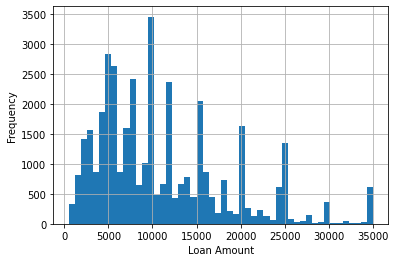

In [5]:
#univariate analysis
#for this, first we can look at loan_amnt and it's distribution by plotting a histogram
loans['loan_amnt'].hist(bins=50)
#set x axis to be the loan amount and y axis to be the frequency
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


From the above histogram, we can see observe the frequency of different loan amounts to get an idea of what the distribution of loan amount is.
1. The frequency of loan_amnt is very high around the 5000 dollar mark.
2. Past 25000 dollars, the frequency is very low. i.e. very few people are granted higher loan amounts.

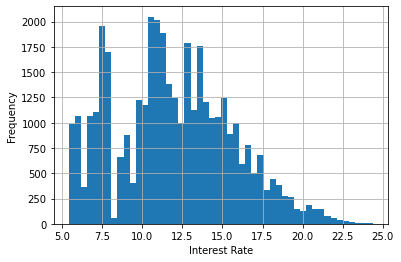

In [6]:
#lets look at the interest rate and it's distribution
loans['int_rate'].hist(bins=50)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

Here again, we are observing the distribution of interest rates. The interest rate is a continuous variable.
From the above histogram, we can see observe the frequency of different interest rates to get an idea of what the distribution of interest rates is.
1. The frequency of interest_rate is very high between 10.0-12.5.
2. Past 15.0 the frequency is very low. i.e. very few people are granted higher interest rates. Higher interest rates might also be a sign of a higher loan amount and we can observe correlation between loan amount and interest rate when we perform bivariate analysis.



In [7]:
#next, we can look at some categorical data and see how it's distributed
loans['home_ownership'].value_counts()
#percentage of people who have home ownership type 'RENT', 'MORTGAGE', 'OWN'
loans['home_ownership'].value_counts(normalize=True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

By just observing the value counts, we can see that a manjority of them are staying in rented or mortgaged homes. Very few people own their own homes in comparison to the others.
1. rent plus mortgage homes cover about 91% of the population.
2. Own homes cover about 7.7% of the population.

In [12]:
#lets look at annual income of different people and how it's varying

#calculate mean, median values also for all income values
print("mean income",loans['annual_inc'].mean())
print("median income",loans['annual_inc'].median())

#we can look at different quartiles of annual income
loans['annual_inc'].describe()
loans['annual_inc'].quantile([0.25,0.5,0.75,1.0])






mean income 68777.97368120901
median income 58868.0


0.25      40000.0
0.50      58868.0
0.75      82000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

If we observe the values, we can see that the mean income is 68777 which is around 10000 more than the median income. Comparing it with the quartiles, we can see that the mean income is between the 50th and 75th quartile. The mean value is higher because we see there are people in the very high income distribution when we see closer to the 100% mark. 

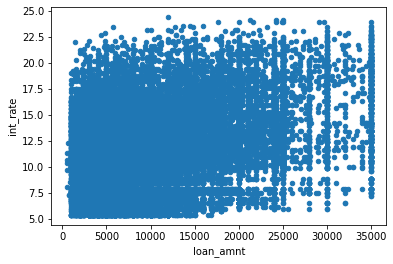

correlation b/w interest rate and loan amount: 0.3012652363773924


In [16]:
#lets look at some bivariate analysis.
#first lets look at the relationship between loan amount and interest rate and find their correlation.
loans.plot(kind='scatter',x='loan_amnt',y='int_rate')
plt.show()

#calculate correlation b/w loan amount and interest rate
print("correlation b/w interest rate and loan amount:",loans['int_rate'].corr(loans['loan_amnt']))




There's a positive correlation of 0.3 between the loan amount and the interest rate. This means that the loan amount is a moderate predictor of the interest rate.